In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Fonctions utiles

In [44]:
# utils fonctions
def cast_cols(df, col_to_cast, type='object'):
    for col in col_to_cast:
        df[col] = df[col].astype(type)
    return df

def fill_missing_values(df):
    for col in df.columns:
        if(df[col].dtype == float) or (df[col].dtype == int):
            df[col] = df[col].fillna(df[col].median())
        if(df[col].dtype == object):
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

def parse_model(df, target_col, x_cols):
    if target_col not in df.columns:
        raise ValueError("Target colums should belong to df")
    y = df[target_col]
    X = df[x_cols]
    return X, y

# Pre-processing

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df = cast_cols(train, ['Survived'])

In [11]:
df =  fill_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipykernel_24/4173489858.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [19]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model trainning (bas model)

In [24]:
# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.664179104477612


In [27]:
# evaluation
# train score
train_score = Reg_log.score(X_train, y_train)
print("Train score: {:0.2%}".format(train_score))

# test score
test_score = Reg_log.score(X_test, y_test)
print("Test score: {:0.2%}".format(test_score))

# metric de classificatio
print(metrics.classification_report(y_test, y_pred))

Train score: 68.06%
Test score: 66.42%
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       157
           1       0.76      0.28      0.41       111

    accuracy                           0.66       268
   macro avg       0.70      0.61      0.59       268
weighted avg       0.69      0.66      0.62       268



In [30]:
# cross validation
kf = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(Reg_log, X, y, cv=kf, n_jobs=1)
print(cv_score)
print(f"Mean score: {cv_score.mean()}")

[0.63687151 0.70224719 0.70786517 0.65730337 0.68539326]
Mean score: 0.6779360994287866


In [33]:
# model coef
Reg_log.coef_

array([[-0.2550921 ,  0.17800211,  0.01534948]])

# Feature engineering

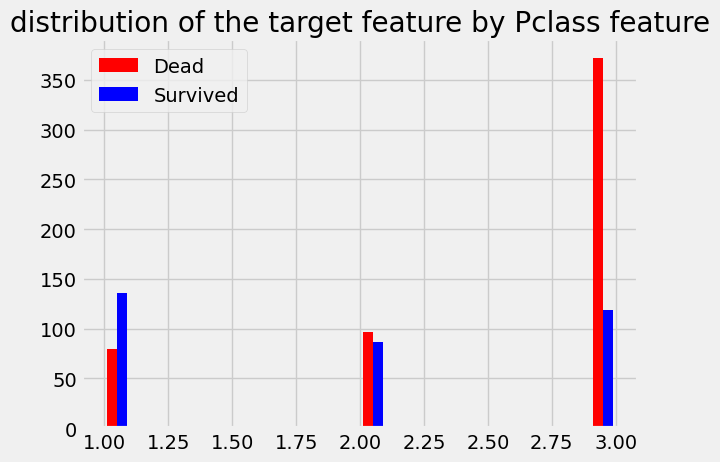

In [51]:
mask = df['Survived'] == 0
dead = df[mask]
survived = df[~mask]

style.use('fivethirtyeight')
%matplotlib inline

x1 = np.array(dead['Pclass'].dropna())
x2 = np.array(survived['Pclass'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass feature")
plt.show()


In [46]:
df = cast_cols(df, ['Pclass'])

## adding Pclass feature to the previous model

In [50]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Pclass'])
# applying one hot encoding to Pclass which is categorical variable
X_dummies = pd.get_dummies(X['Pclass'], prefix='Pclass', drop_first=False, dummy_na=False, prefix_sep='_')
X = X.join(X_dummies).drop("Pclass", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7276119402985075


## looking for adding new new features to enhance the model

In [83]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass'])
# applying one hot encoding to Pclass which is categorical variable
X = pd.get_dummies(X, columns=['Sex', 'Pclass'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7947761194029851


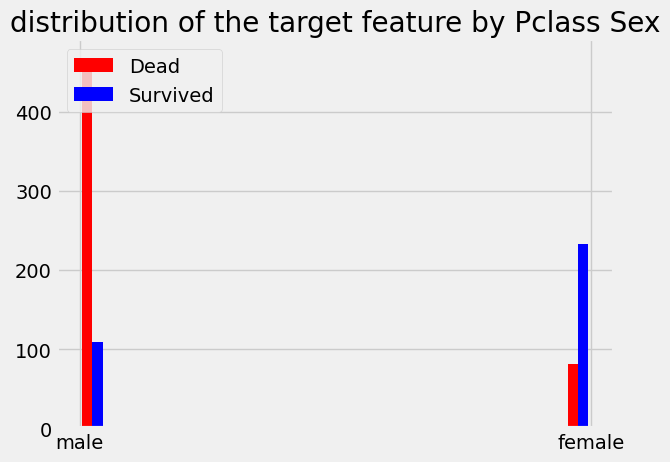

In [87]:
mask = df['Survived'] == 0
dead = df[mask]
survived = df[~mask]

style.use('fivethirtyeight')
%matplotlib inline

x1 = np.array(dead['Sex'].dropna())
x2 = np.array(survived['Sex'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass Sex")
plt.show()


The male passenger have less probaility to survived to the titanic shipwreck

In [60]:
mask = df['Age'] < 10.0
df['isChild'] = np.where(mask, 1, 0)
df = cast_cols(df, ['isChild'])

## adding age categorical feature to the previous model

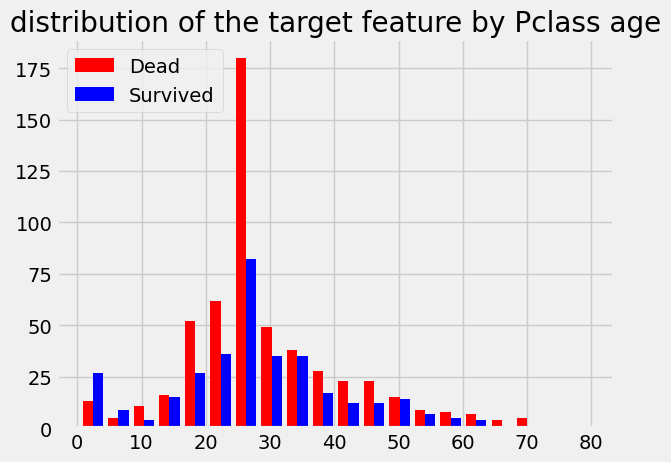

In [85]:
style.use('fivethirtyeight')
%matplotlib inline

x1 = np.array(dead['Age'].dropna())
x2 = np.array(survived['Age'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass age")
plt.show()


We can notice the passengers with less tha 10 years old have more chance to survived to the titanic shipwreck. From that, we are going to create new feature based on the rule if a passenger is less than 10 years old.

In [84]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'isChild'])
# applying one hot encoding to Pclass which is categorical variable
X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'isChild'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8097014925373134


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## adding social rank

In [103]:
df['title'] = df['Name'].apply(lambda x: x.split(' ')[1].split('.')[0].strip())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr


In [119]:
name = 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
map('(' in name

True

In [120]:
# df['surname'] = df['Name'].map(lambda x: '(' in x)
# df.drop('surname')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild,title,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,Mr,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,0,Rev,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,0,Miss,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr,False


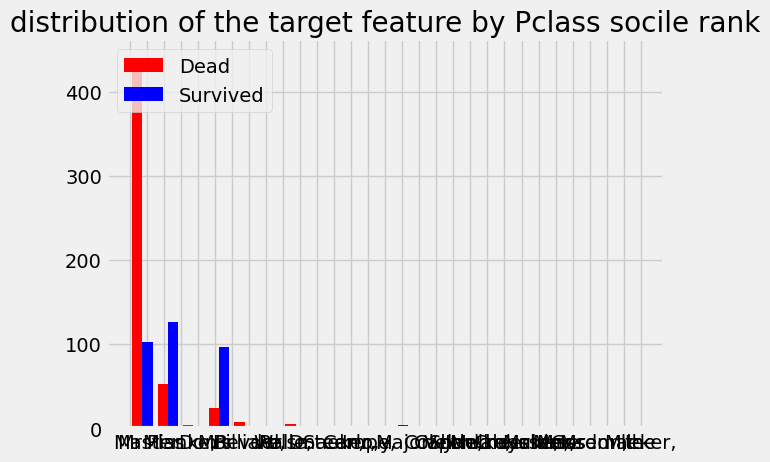

In [105]:
mask = df['Survived'] == 0
dead = df[mask]
survived = df[~mask]

style.use('fivethirtyeight')
%matplotlib inline
figure()
x1 = np.array(dead['title'].dropna())
x2 = np.array(survived['title'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass socile rank")
plt.show()

In [108]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'isChild', 'title'])
# applying one hot encoding to Pclass which is categorical variable
X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'isChild', 'title'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8171641791044776


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------

In [ ]:
def cast_cols(df, col_to_cast, type='object'):
    for col in col_to_cast:
        df[col] = df[col].astype(type)
    return df

def fill_missing_values(df):
    for col in df.columns:
        if(df[col].dtype == float) or (df[col].dtype == int):
            df[col] = df[col].fillna(df[col].median())
        if(df[col].dtype == object):
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

def parse_model(df, target_col, x_cols):
    if target_col not in df.columns:
        raise ValueError("Target colums should belong to df")
    y = df[target_col]
    X = df[x_cols]
    return X, y

In [124]:
def transform(df):
    # cast variable
    df = cast_cols(df, ['Survived', 'Pclass'])
    
    # missing values
    df = fill_missing_values(df)
    
    # add is child column
    df['isChild'] = df['Age'].apply(lambda x: 1 if x < 10  else 0)

    # add tittle colubn
    df['title'] = df['Name'].apply(lambda x: x.split(' ')[1].split('.')[0].strip())

    # adding surname
    df['surname'] = df['Name'].map(lambda x: '(' in x)

    # parse model
    return parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'isChild', 'title', 'surname'])

# -----------------------------------------------------------------------------------------------------------------

def modelisation(X, y, model=LogisticRegression(random_state=42)):
    # applying one hot encoding to Pclass which is categorical variable
    X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'isChild', 'title'], drop_first=False)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # trainning model on train set
    model.fit(X_train, y_train)
    # make prediction
    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    print("Train score: {:0.2%}".format(train_score))
    
    # test score
    test_score = model.score(X_test, y_test)
    print("Test score: {:0.2%}".format(test_score))

    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    

/tmp/ipykernel_24/29879012.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score: 83.79%
Test score: 83.58%


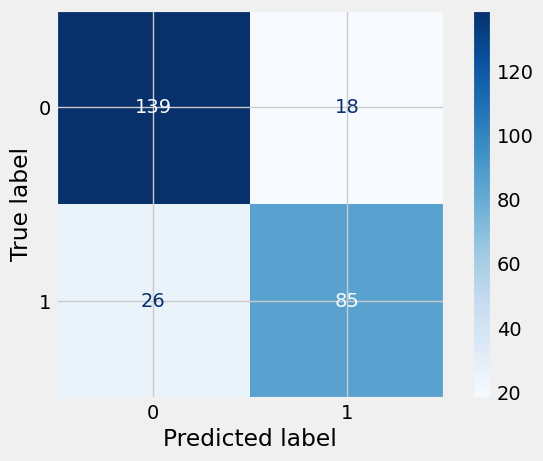

In [125]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
X, y = transform(train)
modelisation(X, y)